# Final Project Task 1: Create corpus 

## Web Crawl for the Business Data 

In [ ]:
# Import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
import time 
import random 

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read review data from online folder

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Mydata/SBRC_Doctor_Reviews.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:
df.head()

,Business ID,Name,Business Category,URL,snippet text,Address,City,State code,zip code,clamed,closed,latitude,longitude,phone
0,rancho-wellness-rancho-cucamonga-7,Rancho Wellness,"Family Practicefamilydr, Weight Loss Centerswe...",https://www.yelp.com/biz/rancho-wellness-ranch...,First off let me say that it takes A LOT for m...,8231 Rochester AveRancho WellnessRancho Cucamo...,Rancho Cucamonga,CA,91730.0,1,0,34.103970,-117.544580,9.094838e+09
1,san-bernardino-medical-group-san-bernardino,San Bernardino Medical Group,"Family Practicefamilydr, Internal Medicineinte...",https://www.yelp.com/biz/san-bernardino-medica...,I have been coming to SBMG for over ten years ...,"1700 N Waterman AveSan Bernardino, CA 92404",San Bernardino,CA,92404.0,1,0,34.130330,-117.279740,9.098839e+09
2,st-bernardine-medical-center-baby-and-family-c...,St. Bernardine Medical Center Baby and Family ...,"Family Practicefamilydr, Pediatricianspediatri...",https://www.yelp.com/biz/st-bernardine-medical...,Disregard the fact that I'm a man. My wife was...,"403 E Highland AveSan Bernardino, CA 92404",San Bernardino,CA,92404.0,1,0,34.135776,-117.275612,9.098814e+09
3,beaver-medical-group-highland-2,Beaver Medical Group,"Family Practicefamilydr, Internal Medicineinte...",https://www.yelp.com/biz/beaver-medical-group-...,First time ever going to this particular Beave...,"7223 Church StSte CHighland, CA 92346",Highland,CA,92346.0,1,0,34.122251,-117.173181,9.098621e+09
4,ali-uzma-r-md-fontana-2,Ali Uzma R MD,"Pediatricianspediatricians,",https://www.yelp.com/biz/ali-uzma-r-md-fontana-2,I have been going to Dr. Ali for over 7 years ...,"Fontana, CA 92336",Fontana,CA,92336.0,1,0,34.156970,-117.482160,9.093553e+09


In [ ]:
len(df)

2607

In [ ]:
# Sample row
df.loc[376]

Business ID                        skin-physicians-and-surgeons-upland
Name                                        Skin Physicians & Surgeons
Business Category    Dermatologistsdermatology, Skin Careskincare, ...
URL                  https://www.yelp.com/biz/skin-physicians-and-s...
snippet text         Great experience!\n\nI was very pleased with m...
Address                       859 E Foothill BlvdSte BUpland, CA 91786
City                                                            Upland
State code                                                          CA
zip code                                                       91786.0
clamed                                                               1
closed                                                               0
latitude                                                      34.10751
longitude                                                   -117.63934
phone                                                     9099818929.0
Name: 

In [ ]:
# The link
df.loc[0].URL

'https://www.yelp.com/biz/rancho-wellness-rancho-cucamonga-7'

In [ ]:
# Business ID
df.loc[0][0]

'rancho-wellness-rancho-cucamonga-7'

In [ ]:
# Parse the homepage of a business
url = df.loc[376].URL
# Make a GET request to the target URL to get the raw HTML data
response = requests.get(url).text
# Use BeautifulSoup to parse HTML
soup = BeautifulSoup(response,'html.parser')

In [ ]:
# use find() to find the number of reviews.
# inspect html to find out the unique class for number of reviews
import re
number_reviews = soup.find (class_=' css-foyide').text
#Use re to extract the numbers from a string 
number_reviews = int(re.findall('\d+', number_reviews)[0])
print (number_reviews)

148


In [ ]:
# create a loop thorugh the URL pattern
url_list = []
for i in range (0, number_reviews, 10):
  url_list.append(df.loc[0].URL + '?start=' +str(i))
print (*url_list, sep='\n')

https://www.yelp.com/biz/rancho-wellness-rancho-cucamonga-7?start=0
https://www.yelp.com/biz/rancho-wellness-rancho-cucamonga-7?start=10
https://www.yelp.com/biz/rancho-wellness-rancho-cucamonga-7?start=20
https://www.yelp.com/biz/rancho-wellness-rancho-cucamonga-7?start=30
https://www.yelp.com/biz/rancho-wellness-rancho-cucamonga-7?start=40
https://www.yelp.com/biz/rancho-wellness-rancho-cucamonga-7?start=50
https://www.yelp.com/biz/rancho-wellness-rancho-cucamonga-7?start=60
https://www.yelp.com/biz/rancho-wellness-rancho-cucamonga-7?start=70
https://www.yelp.com/biz/rancho-wellness-rancho-cucamonga-7?start=80
https://www.yelp.com/biz/rancho-wellness-rancho-cucamonga-7?start=90
https://www.yelp.com/biz/rancho-wellness-rancho-cucamonga-7?start=100
https://www.yelp.com/biz/rancho-wellness-rancho-cucamonga-7?start=110
https://www.yelp.com/biz/rancho-wellness-rancho-cucamonga-7?start=120
https://www.yelp.com/biz/rancho-wellness-rancho-cucamonga-7?start=130
https://www.yelp.com/biz/rancho

In [ ]:
# use the first url to see the text
url = url_list[0]
response = requests.get(url).text
soup = BeautifulSoup(response,'html.parser')
# find out all the review block
results = soup.findAll (class_=' review__09f24__oHr9V border-color--default__09f24__NPAKY')
print (len(results))

10


In [ ]:
# pick one review to test
review = results[0]
# get username. Inspect user name and find its class
username = review.find (class_='css-1m051bw').text
print (username)

Sandra R.


In [ ]:
# extract attribute value using the key aria-label for star ratings. 
rating = review.find (class_=' five-stars__09f24__mBKym five-stars--regular__09f24__DgBNj display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY')['aria-label']
rating = float (re.findall('\d+', rating)[0])
print (rating)

5.0


In [ ]:
# extract date of review; same use inspect to find that it is a span class
review_date = review.find (class_='css-chan6m').text
print (review_date)

7/12/2022


In [ ]:
# retrieve all review content
review_content = review.find(class_='raw__09f24__T4Ezm', attrs={'lang':'en'}).text
print (review_content)

In my experience no office staff is perfect but Rancho Wellness has met our family needs for the past 5+ years and I appreciate the help and hard work that has been done to keep our family healthy. Dr. Singh is quite busy so don't get to see him as often as we would like but if you do get the chance to, he rocks at bedside manners and educating his patients. Heidi is super knowledgeable and so kind as well.


In [ ]:
# create a list of review from one person
single_review =[username, rating, review_date,review_content]
print (single_review)

['Sandra R.', 5.0, '7/12/2022', "In my experience no office staff is perfect but Rancho Wellness has met our family needs for the past 5+ years and I appreciate the help and hard work that has been done to keep our family healthy. Dr. Singh is quite busy so don't get to see him as often as we would like but if you do get the chance to, he rocks at bedside manners and educating his patients. Heidi is super knowledgeable and so kind as well."]


In [ ]:
# create a list of all review deatils of a single page 
single_page_review = []
for review in results:
  # retrieve user name
  username = review.find (class_='css-1m051bw').text
  # extract attribute value using the key aria-label for star ratings. 
  rating = review.find (class_=' five-stars__09f24__mBKym five-stars--regular__09f24__DgBNj display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY')['aria-label']
  # \d+ is a rgular exression pattern to extract numbers from a string
  rating = float (re.findall('\d+', rating)[0])
  # extract date of review; same use inspect to find that it is a span class
  review_date = review.find (class_='css-chan6m').text
  # retrieve all review content
  review_content = review.find(class_='raw__09f24__T4Ezm', attrs={'lang':'en'}).text
  single_review =[username, rating, review_date,review_content]
  print (single_review)
  single_page_review.append (single_review)

['Sandra R.', 5.0, '7/12/2022', "In my experience no office staff is perfect but Rancho Wellness has met our family needs for the past 5+ years and I appreciate the help and hard work that has been done to keep our family healthy. Dr. Singh is quite busy so don't get to see him as often as we would like but if you do get the chance to, he rocks at bedside manners and educating his patients. Heidi is super knowledgeable and so kind as well."]
['Gina R.', 5.0, '10/25/2022', "I love this place! \xa0Of course no one likes being sick but when my family and I know that we have a good doctors office with very professional doctor, PA's and staff that alone makes us feel so much better. \xa0We know when making an appointment this office will actually answer their phones, and attend to our needs and questions. \xa0Dr Singh and his team are by far the best! \xa0I recommend them to anyone who is looking for a doctor."]
['Whitney W.', 5.0, '5/27/2021', 'After seeing 4.5 stars reviews on a family pr

In [ ]:
print (*single_page_review, sep='\n')

['Sandra R.', 5.0, '7/12/2022', "In my experience no office staff is perfect but Rancho Wellness has met our family needs for the past 5+ years and I appreciate the help and hard work that has been done to keep our family healthy. Dr. Singh is quite busy so don't get to see him as often as we would like but if you do get the chance to, he rocks at bedside manners and educating his patients. Heidi is super knowledgeable and so kind as well."]
['Gina R.', 5.0, '10/25/2022', "I love this place! \xa0Of course no one likes being sick but when my family and I know that we have a good doctors office with very professional doctor, PA's and staff that alone makes us feel so much better. \xa0We know when making an appointment this office will actually answer their phones, and attend to our needs and questions. \xa0Dr Singh and his team are by far the best! \xa0I recommend them to anyone who is looking for a doctor."]
['Whitney W.', 5.0, '5/27/2021', 'After seeing 4.5 stars reviews on a family pr

In [ ]:
# Define a function to crawl the review in the link
def scrape_single_review (id, url):
    response = requests.get(url).text
    # Use BeautifulSoup to parse HTML
    soup = BeautifulSoup(response,'html.parser')
    # get all content for one review
    results = soup.findAll (class_=' review__09f24__oHr9V border-color--default__09f24__NPAKY')
    single_page_review = []
    for review in results:
      # retrieve user name
      username = review.find (class_='css-1m051bw').text
      # extract attribute value using the key aria-label for star ratings. 
      rating = review.find (class_=' five-stars__09f24__mBKym five-stars--regular__09f24__DgBNj display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY')['aria-label']
      # \d+ is a rgular exression pattern to extract numbers from a string
      rating = float (re.findall('\d+', rating)[0])
      # extract date of review; same use inspect to find that it is a span class
      review_date = review.find (class_='css-chan6m').text
      # retrieve all review content
      review_content = review.find(class_='raw__09f24__T4Ezm', attrs={'lang':'en'}).text
      single_review =[id, username, rating, review_date,review_content, url]
      single_page_review.append (single_review)
    return single_page_review

In [ ]:
# test the function using one URL
r = scrape_single_review (df.loc[376][0], df.loc[376].URL)
# check the shape of the array
np.asarray(r).shape

(10, 6)

In [ ]:
print (*r, sep='\n')

['rancho-wellness-rancho-cucamonga-7', 'Sandra R.', 5.0, '7/12/2022', "In my experience no office staff is perfect but Rancho Wellness has met our family needs for the past 5+ years and I appreciate the help and hard work that has been done to keep our family healthy. Dr. Singh is quite busy so don't get to see him as often as we would like but if you do get the chance to, he rocks at bedside manners and educating his patients. Heidi is super knowledgeable and so kind as well.", 'https://www.yelp.com/biz/rancho-wellness-rancho-cucamonga-7']
['rancho-wellness-rancho-cucamonga-7', 'Gina R.', 5.0, '10/25/2022', "I love this place! \xa0Of course no one likes being sick but when my family and I know that we have a good doctors office with very professional doctor, PA's and staff that alone makes us feel so much better. \xa0We know when making an appointment this office will actually answer their phones, and attend to our needs and questions. \xa0Dr Singh and his team are by far the best! \x

In [ ]:
# Get all reviews
all_reviews = []
for index, url in enumerate(url_list):
  all_reviews = all_reviews + scrape_single_review (df.loc[376][0], url)
  # random sleep to avoid getting banned by Yelp 
  #print(*all_reviews, sep= '\n')
  time.sleep (random.randint(30, 40))
  # log the progress
  print ('finished page' + str(index+1))

finished page1
finished page2
finished page3
finished page4
finished page5
finished page6
finished page7
finished page8
finished page9
finished page10
finished page11
finished page12
finished page13
finished page14
finished page15


In [ ]:
# check the shape of the all reviews to know all reviews are retrieved. 
np.shape (all_reviews)

(150, 6)

In [ ]:
# use the df to store data
df_test = pd.DataFrame(all_reviews)
df_test.columns = ['business_id', 'user_name', 'rating', 'review_date', 'review', 'URL']
df_test.head(3)

,business_id,user_name,rating,review_date,review,URL
0,skin-physicians-and-surgeons-upland,Sandra R.,5.0,7/12/2022,In my experience no office staff is perfect bu...,https://www.yelp.com/biz/rancho-wellness-ranch...
1,skin-physicians-and-surgeons-upland,Gina R.,5.0,10/25/2022,I love this place! Of course no one likes bei...,https://www.yelp.com/biz/rancho-wellness-ranch...
2,skin-physicians-and-surgeons-upland,Whitney W.,5.0,5/27/2021,After seeing 4.5 stars reviews on a family pra...,https://www.yelp.com/biz/rancho-wellness-ranch...


In [ ]:
# Read data if need to concat
df_crawl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/final_project_review_0_35.csv', index_col = 0)
df_crawl.tail(3)

,business_id,user_name,rating,review_date,review,URL
97,hrc-fertility-rancho-cucamonga-rancho-cucamonga,Melanie L.,5.0,7/31/2014,After 4 years of trying naturally we decided t...,https://www.yelp.com/biz/hrc-fertility-rancho-...
98,hrc-fertility-rancho-cucamonga-rancho-cucamonga,Suzie C.,4.0,12/7/2013,"My first time writing a review on yelp, but al...",https://www.yelp.com/biz/hrc-fertility-rancho-...
99,hrc-fertility-rancho-cucamonga-rancho-cucamonga,Savannah F.,5.0,3/20/2015,My husband and I were referred to Dr Norian by...,https://www.yelp.com/biz/hrc-fertility-rancho-...


In [ ]:
# Function for collect reviews

def scrape_single_review (id, url):
    response = requests.get(url).text
    # Use BeautifulSoup to parse HTML
    soup = BeautifulSoup(response,'html.parser')
    # get all content for one review
    results = soup.findAll (class_=' review__09f24__oHr9V border-color--default__09f24__NPAKY')
    single_page_review = []
    for review in results:
      # retrieve user name
      username = review.find (class_='css-1m051bw').text
      # extract attribute value using the key aria-label for star ratings. 
      rating = review.find (class_=' five-stars__09f24__mBKym five-stars--regular__09f24__DgBNj display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY')['aria-label']
      # \d+ is a rgular exression pattern to extract numbers from a string
      rating = float (re.findall('\d+', rating)[0])
      # extract date of review; same use inspect to find that it is a span class
      review_date = review.find (class_='css-chan6m').text
      # retrieve all review content
      review_content = review.find(class_='raw__09f24__T4Ezm', attrs={'lang':'en'}).text
      single_review =[id, username, rating, review_date,review_content, url]
      single_page_review.append (single_review)
    return single_page_review

In [ ]:
# Function for read business

def crwal_document(business, df_crawl):  
  # Make a GET request to the target URL to get the raw HTML data
  response = requests.get(business.URL).text
  # Use BeautifulSoup to parse HTML
  soup = BeautifulSoup(response,'html.parser')
  # use find() to find the number of reviews. Do not need find.all here
  # inspect html to find out the unique class for number of reviews
  number_reviews = soup.find (class_=' css-foyide').text
  #Use rex to extract the numbers from a string 
  number_reviews = int(re.findall('\d+', number_reviews)[0])
  # create a loop thorugh the URL pattern
  url_list = []
  for i in range (0, number_reviews, 10):
    url_list.append(business.URL + '?start=' +str(i))

  all_reviews = []
  for url in url_list:
    all_reviews = all_reviews + scrape_single_review (business[0], url)
    # random sleep to avoid getting banned by Yelp 
    #print(*all_reviews, sep= '\n')
    time.sleep (random.randint(30, 40))

  df_new = pd.DataFrame(all_reviews)
  df_new.columns = ['business_id', 'user_name', 'rating', 'review_date', 'review', 'URL']
  df_crawl = pd.concat([df_crawl, df_new])
  print("Now total review is ", len(df_crawl))
  print("Finish " + business[0] + " collection.")
  return df_crawl

In [ ]:
# Start to crawl

for i in range(65, 81):
  df_crawl = crwal_document(df.loc[i], df_crawl)
  time.sleep (random.randint(90, 120))

Now total review is  2951
Finish williams-john-t-dpm-redlands collection.
Now total review is  2956
Finish perform-athletic-recovery-center-highland collection.
Now total review is  2961
Finish schwartz-leon-e-md-san-bernardino collection.
Now total review is  2977
Finish bijan-zardouz-md-san-bernardino collection.
Now total review is  2999
Finish sac-health-system-san-bernardino collection.
Now total review is  3034
Finish todd-c-rau-md-redlands-3 collection.
Now total review is  3108
Finish beaver-medical-group-urgent-care-redlands-2 collection.
Now total review is  3198
Finish li-plastic-surgery-ontario collection.
Now total review is  3243
Finish vida-health-clinic-montclair-2 collection.
Now total review is  3521
Finish little-star-pediatric-urgent-care-rancho-cucamonga collection.
Now total review is  3566
Finish daniel-b-channell-m-d-rancho-cucamonga collection.
Now total review is  3633
Finish basim-abdelkarim-md-upland-11 collection.
Now total review is  3660
Finish form-and-f

In [ ]:
df_crawl.tail()

,business_id,user_name,rating,review_date,review,URL
5,pure-gold-medical-center-redlands-2,Chante H.,1.0,6/21/2019,Went to this doctor to fill my lips I spent 13...,https://www.yelp.com/biz/pure-gold-medical-cen...
6,pure-gold-medical-center-redlands-2,Enyioma E.,1.0,5/23/2019,Yes my consult was complimentary - nothing spe...,https://www.yelp.com/biz/pure-gold-medical-cen...
7,pure-gold-medical-center-redlands-2,E R.,2.0,3/28/2019,I have never left a review before when things ...,https://www.yelp.com/biz/pure-gold-medical-cen...
8,pure-gold-medical-center-redlands-2,Travis G.,1.0,8/27/2016,Great customer service UNTIL there's an issue ...,https://www.yelp.com/biz/pure-gold-medical-cen...
9,pure-gold-medical-center-redlands-2,Christie J.,1.0,9/8/2018,DO NOT GO HERE! I had a breast augmentation do...,https://www.yelp.com/biz/pure-gold-medical-cen...


In [ ]:
len(df_crawl)

1462

In [ ]:
# saving the data frame to the google drive folder
df_crawl.to_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/final_project_review_0_35.csv')

## Merge Review Data

Since each group member use the code above the get reviews from 125 business, we need to merge all of the review data to be the whole corpus.

In [ ]:
# Read review data from online folder

df_123 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/final_project_review_0_123.csv', index_col = 0)
df_123.head()

,business_id,user_name,rating,review_date,review,URL
0,chuang-t-hung-md-upland,Gregory P.,5.0,7/13/2021,Best guy to check what's going on up there!!! ...,https://www.yelp.com/biz/chuang-t-hung-md-upla...
1,chuang-t-hung-md-upland,Corvetta M.,1.0,10/14/2022,This review does not reflect what I think of t...,https://www.yelp.com/biz/chuang-t-hung-md-upla...
2,chuang-t-hung-md-upland,Micky B.,1.0,8/3/2022,I have been having issues with my liver/stomac...,https://www.yelp.com/biz/chuang-t-hung-md-upla...
3,chuang-t-hung-md-upland,Hayden R.,1.0,11/14/2022,I had an appointment and I showed up twenty mi...,https://www.yelp.com/biz/chuang-t-hung-md-upla...
4,chuang-t-hung-md-upland,Miao T.,1.0,7/1/2022,First of all this has nothing to do with Docto...,https://www.yelp.com/biz/chuang-t-hung-md-upla...


In [ ]:
# Read review data from online folder

df_249 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/final_project_Reviews_124_249.csv', index_col = 0)
df_249.head()

,business_id,user_name,rating,review_date,review,URL
0,edward-h-park-md-upland,Courtney D.,5.0,9/17/2022,Update !!! I FINALLY got my surgery and I coul...,https://www.yelp.com/biz/edward-h-park-md-upla...
1,edward-h-park-md-upland,Bree M.,5.0,11/8/2022,If I can give more than 5 stars I would!!! Thi...,https://www.yelp.com/biz/edward-h-park-md-upla...
2,edward-h-park-md-upland,Tori Blaze W.,5.0,7/25/2022,Where do I even start? Dr. Park and ALL of his...,https://www.yelp.com/biz/edward-h-park-md-upla...
3,edward-h-park-md-upland,Gayle B.,1.0,6/23/2022,I'm 65 years old and I've gone through a lot i...,https://www.yelp.com/biz/edward-h-park-md-upla...
4,edward-h-park-md-upland,Janae D.,2.0,3/3/2022,When I started looking into getting my plastic...,https://www.yelp.com/biz/edward-h-park-md-upla...


In [ ]:
# Read review data from online folder

df_375 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/Business_Reviews_250_375.csv', index_col = 0)
df_375.head()

,business_id,user_name,rating,review_date,review,URL
0,ronnie-n-dawood-m-d-redlands,Cliff W.,5.0,6/13/2017,Dr. Dawood is an outstanding physician with th...,https://www.yelp.com/biz/ronnie-n-dawood-m-d-r...
1,ronnie-n-dawood-m-d-redlands,Melissa P.,5.0,2/25/2022,Dr Dawood is great! He's very knowledgeable ab...,https://www.yelp.com/biz/ronnie-n-dawood-m-d-r...
2,ronnie-n-dawood-m-d-redlands,Titika W.,5.0,1/24/2020,Professional staff and great service. I get th...,https://www.yelp.com/biz/ronnie-n-dawood-m-d-r...
3,ronnie-n-dawood-m-d-redlands,Chanel E.,5.0,7/16/2019,OMG!! what an awesome experience. I could not ...,https://www.yelp.com/biz/ronnie-n-dawood-m-d-r...
4,ronnie-n-dawood-m-d-redlands,Joann R.,5.0,5/24/2018,I have been seeing Dr Dawood for about 3 years...,https://www.yelp.com/biz/ronnie-n-dawood-m-d-r...


In [ ]:
# Read review data from online folder

df_499 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/final_project_combined_377_499.csv', index_col = 0)
df_499.head()

,business_id,user_name,rating,review_date,review,URL
0,schwarz-wellness-center-redlands,Tm G.,5.0,10/25/2019,The Schwarz Wellness Center is a FANTASTIC Res...,https://www.yelp.com/biz/schwarz-wellness-cent...
1,schwarz-wellness-center-redlands,Brian I.,5.0,7/20/2020,Pam is pretty much as good as it gets when it ...,https://www.yelp.com/biz/schwarz-wellness-cent...
2,raymond-zarins-md-redlands,Scott T.,5.0,1/4/2018,Dr. Zarins has treated me for several sports i...,https://www.yelp.com/biz/raymond-zarins-md-red...
3,terracina-surgical-arts-redlands,Laura B.,5.0,10/20/2022,Dr. Punjabi is the best. Gives quick and effi...,https://www.yelp.com/biz/terracina-surgical-ar...
4,terracina-surgical-arts-redlands,Marni B.,5.0,1/9/2021,Upon my arrival I felt as though I was walking...,https://www.yelp.com/biz/terracina-surgical-ar...


In [ ]:
# Concat each review files
df_all = pd.concat([df_123, df_249])

In [ ]:
# Concat each review files
df_all = pd.concat([df_all, df_375])

In [ ]:
# Concat each review files
df_all = pd.concat([df_all, df_test])

In [ ]:
# Concat each review files
df_all = pd.concat([df_all, df_499])

In [ ]:
len(df_all)

12230

In [ ]:
# saving the data frame to the google drive folder
df_all.to_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/final_project_review_0_499.csv')

## Summary statistics of the corpus  

In [ ]:
# Import useful modules

import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import numpy as np
import time 

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read review data from online folder

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/reviews_and_metadata_all_version1.csv', index_col = 0)

In [ ]:
# Show several lines

df.head()

,username,rating,date_of_review,review_content,rounded_rating,doctorID,Business ID,Name,Business Category,URL,snippet text,Address,City,State code,zip code,clamed,closed,latitude,longitude,phone
0,Gregory P.,5.0,7/13/2021,Best guy to check what's going on up there!!! ...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,"629 N 13th AveUpland, CA 91786",Upland,CA,91786.0,1,0,34.101295,-117.633995,9.099853e+09
1,Corvetta M.,1.0,10/14/2022,This review does not reflect what I think of t...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,"629 N 13th AveUpland, CA 91786",Upland,CA,91786.0,1,0,34.101295,-117.633995,9.099853e+09
2,Micky B.,1.0,8/3/2022,I have been having issues with my liver/stomac...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,"629 N 13th AveUpland, CA 91786",Upland,CA,91786.0,1,0,34.101295,-117.633995,9.099853e+09
3,Hayden R.,1.0,11/14/2022,I had an appointment and I showed up twenty mi...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,"629 N 13th AveUpland, CA 91786",Upland,CA,91786.0,1,0,34.101295,-117.633995,9.099853e+09
4,Miao T.,1.0,7/1/2022,First of all this has nothing to do with Docto...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,"629 N 13th AveUpland, CA 91786",Upland,CA,91786.0,1,0,34.101295,-117.633995,9.099853e+09


In [ ]:
print('Number of rows: ', len(df))

Number of rows:  63743


In [ ]:
# check the data types 
df.dtypes

username              object
rating               float64
date_of_review        object
review_content        object
rounded_rating       float64
doctorID               int64
Business ID           object
Name                  object
Business Category     object
URL                   object
snippet text          object
Address               object
City                  object
State code            object
zip code             float64
clamed                 int64
closed                 int64
latitude             float64
longitude            float64
phone                float64
dtype: object

In [ ]:
# use default to show descriptive statistics for numeric fields. 
df.describe()

,rating,rounded_rating,doctorID,zip code,clamed,closed,latitude,longitude,phone
count,63743.000000,63743.000000,63743.000000,63697.000000,63743.00000,63743.0,63740.000000,63740.000000,6.299900e+04
mean,3.022387,3.025218,1474.368982,92290.065278,0.69479,0.0,33.922227,-117.311473,9.092812e+09
std,1.896101,1.007252,842.545000,607.064906,0.46050,0.0,0.264235,0.359488,6.338010e+08
min,1.000000,1.000000,0.000000,45429.000000,0.00000,0.0,32.763110,-118.380737,2.709518e+09
25%,1.000000,2.200000,771.000000,91786.000000,0.00000,0.0,33.711712,-117.567640,9.094668e+09
50%,3.000000,2.900000,1469.000000,92399.000000,1.00000,0.0,33.974807,-117.328545,9.099853e+09
75%,5.000000,3.900000,2251.000000,92562.000000,1.00000,0.0,34.100340,-117.183092,9.516372e+09
max,5.000000,5.000000,2606.000000,93555.000000,1.00000,0.0,35.622102,-114.287177,9.712178e+09


In [ ]:
# Aggregated the reviews by business ID
df_aggre = df.groupby('Business ID ').count()['username'].reset_index()
df_aggre.columns = ['Business ID ', 'Number of Reviews']
df_aggre

,Business ID,Number of Reviews
0,24-7-care-at-home-westminster-2,7
1,4-ever-green-collective-riverside,9
2,a-doctors-weight-loss-clinic-moreno-valley-2,13
3,a-gobaud-orthopaedic-medical-clnc-and-bck-trtm...,1
4,a-healing-within-palm-desert,14
...,...,...
2463,yusufaly-imdad-md-wildomar,19
2464,yvonne-d-sylva-md-corona,49
2465,zacher-judith-md-palm-desert,5
2466,zeid-k-kayali-md-rialto-2,11


In [ ]:
# distributions (mean, max, and min) of aggregation data
df_aggre.describe()

,Number of Reviews
count,2468.000000
mean,25.827796
std,49.925814
min,1.000000
25%,4.000000
50%,10.000000
75%,26.000000
max,633.000000


Text(0, 0.5, 'count of business')

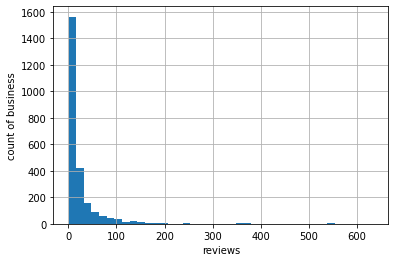

In [ ]:
# Histogram for reviwes of each business
import matplotlib.pyplot as plt
df.groupby('Business ID ').count().username.hist(bins = 40)
plt.xlabel('reviews')
plt.ylabel('count of business')